<a href="https://colab.research.google.com/github/nestorbalcazar/nestorbalcazar.github.io/blob/master/HMT_VariThermCond_PlaneWall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib scipy

$\textbf{Step 1: T(x) and q(x)} \\
\int_{T_0}^{T} \lambda_I(T) \, dT = -0.5 \cdot q_{vI} \cdot (x^2 - x_0^2) - C_1 \cdot (x - x_0) \\
\lambda_I = f_{\lambda_I}(T) \\
q_I(x, C_1) = -(-q_{vI} \cdot x + C_1) \\
\, \\
\, \\
\textbf{Step 2: Local energy balances} \\
0 = \alpha_A \cdot (T_A - T_0) \cdot S_0 - q_I(x_0, C_1) \cdot S_0, \, \, \mathrm{Eq.(1), \, 2\,  unknows(T_0, C_1)}. \\
0 = -\alpha_B \cdot (T_1 - T_B) \cdot S_1 + q_I(x_1, C_1) \cdot S_1, \, \,  \mathrm{Eq.(2), \, 3\, unknows (T_1)}.  \\
0 = \int_{T_0}^{T_1} f_\lambda(T) \, dT - \left(-0.5 \cdot q_{vI} \cdot (x_1^2 - x_0^2) - C_1 \cdot (x_1 - x_0)\right), \, \,  \mathrm{Eq.(3), \, 3\,  unknows}. \\
$

REPORT:
T0      = 99.018819 [C]
T1      = 94.686826 [C]
C1      = 5531.317354
Global energy balance:
Res_GlobEnergyBal = Qconv0 - Qconv1 + QvI = 0.000000 [W]


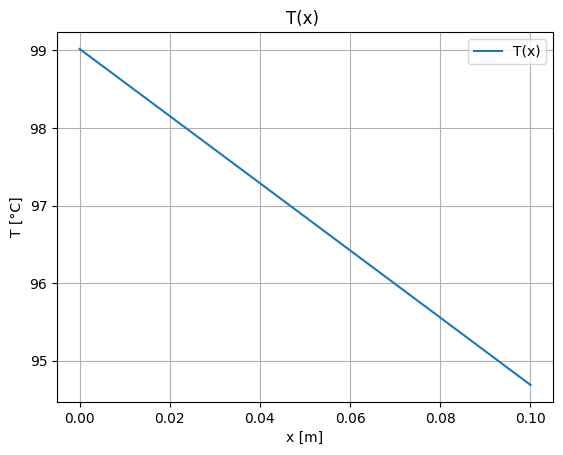

In [ ]:
# Plane wall with variable thermal conductivity
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.special import iv, kv
from scipy.integrate import quad

# STEP 0: Input data (reference case)
H       = 1  # m
W       = 1  # m
LI      = 0.1  # m
alphaA  = 70  # W/(m2 K)
alphaB  = 100  # W/(m2 K)
TA      = 20  # C
TB      = 150  # C
lambdaI = 220  # W/(m K)
qvI     = 0    # W/m3

# Parameters
x0      = 0    # m
x1      = x0 + LI
S0      = W * H
S1      = W * H
VI      = W * H * LI

#Thermal conductivity
a0   = 120
a1   = 0.1
Tref = 20
def fLambda(T):
    return a0 + a1*(T-Tref)

# STEP 1: T(x) and q(x) for each component
def fqI(x, C1):
    return -(-qvI * x + C1)

# STEP 2: Local energy balances. Numerical Resolution
def FunTermotFin(X):
    T0, T1, C1 = X

    F = np.zeros(3)
    F[0] = alphaA * (TA - T0) * S0 - fqI(x0, C1) * S0
    F[1] = -alphaB * (T1 - TB) * S1 + fqI(x1, C1) * S1
    F[2] = quad(fLambda, T0, T1)[0] - ((-0.5 * qvI * (x1**2 - x0**2)) - C1 * (x1 - x0))

    return F

X0 = np.array([TA, TB, 1])  # Estimated values [T0, T1, C1]
X  = fsolve(FunTermotFin, X0)
T0, T1, C1 = X

# STEP 3: Verification. Global energy balance
Qconv0            = alphaA * (TA - T0) * S0
Qconv1            = alphaB * (T1 - TB) * S1
QvI               = qvI * VI
Res_GlobEnergyBal = Qconv0 - Qconv1 + QvI

# Displaying results
def printReport():
    print("==============================================================================")
    print("REPORT:")
    print(f"T0      = {T0:.6f} [C]")
    print(f"T1      = {T1:.6f} [C]")
    print(f"C1      = {C1:.6f}")
    print("Global energy balance:")
    print(f"Res_GlobEnergyBal = Qconv0 - Qconv1 + QvI = {Res_GlobEnergyBal:.6f} [W]")
    print("==============================================================================")

# Print the report
printReport()

def eqfTI(T, x):
    return quad(fLambda, T0, T)[0] - ((-0.5 * qvI * (x**2 - x0**2)) - C1 * (x - x0))

# Valores de x en el intervalo [x0, x1]
xI  = np.linspace(x0, x1, 100)
TI  = []

for x in xI:
    T_solution = fsolve(eqfTI, T0, args=(x))[0]
    TI.append(T_solution)

TI = np.array(TI)

# Graficar T vs x
plt.plot(xI, TI, label="T(x)")
plt.xlabel("x [m]")
plt.ylabel("T [°C]")
plt.title("T(x) ")
plt.legend()
plt.grid(True)
plt.axis('tight')
plt.show()